In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

## Samples ellipticity

In [33]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_63/shape_samples.npz")

In [34]:
ep = ds['e1e2p']
em = ds['e1e2m']

In [35]:
ep.shape

(10000, 300, 2)

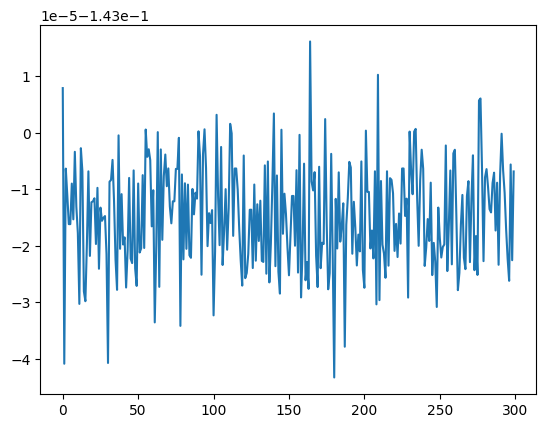

In [30]:
plt.plot(ep[13, :, 0])

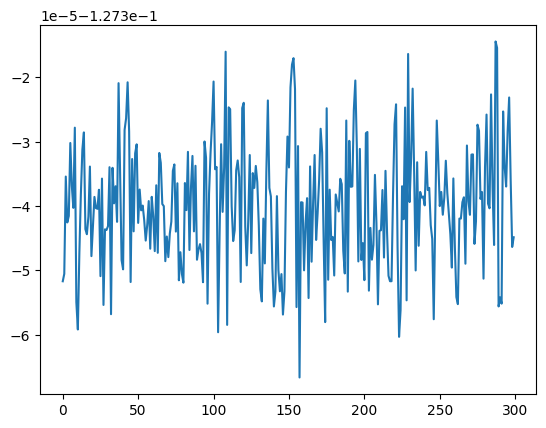

In [31]:
plt.plot(em[17, :, 0])

## Bootstrap 

In [40]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_47/g_samples_boots_472.npz")# 100k galaxies, 0.2 shape noise 

In [59]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_48/g_samples_boots_482.npz") # 200k galaxies, 0.2 shape noise 

In [60]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_49/g_samples_boots_492.npz")

In [61]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/g_samples_boots_452.npz") # shape_noise = 0.01, N_gal = 10k

In [80]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_50/g_samples_boots_502.npz")

In [ ]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_60/g_samples_boots_602.npz")


In [2]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_62/g_samples_boots_622.npz")


In [15]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_63/g_samples_boots_632.npz")

In [16]:
ds.keys()

dict_keys(['g_minus', 'g_plus'])

In [17]:
ds['g_plus'].shape

(500, 1000, 2)

In [18]:
gps = ds['g_plus']
gms = ds['g_minus']

In [19]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(500,)

(array([  8.,  15.,  47.,  84., 120., 117.,  64.,  26.,  13.,   5.,   1.]),
 array([0.01524785, 0.01631483, 0.01738182, 0.01844881, 0.01951579,
        0.02058278, 0.02164977, 0.02271675, 0.02378374, 0.02485072,
        0.02591771, 0.0269847 ]),
 <BarContainer object of 11 artists>)

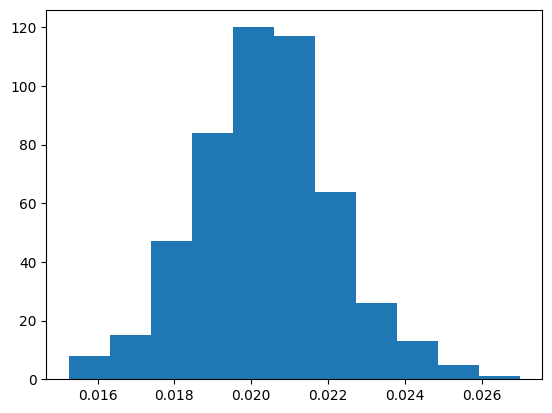

In [20]:
plt.hist(gp1_mean, bins=11)

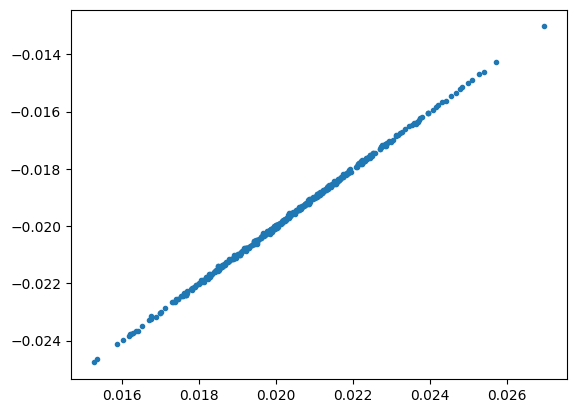

In [21]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [22]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[3.30830768e-06, 3.30677189e-06],
       [3.30677189e-06, 3.30642766e-06]])

In [23]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.0008629740487255674)

In [24]:
m_boot = (gp1_mean - gm1_mean) / 2/ 0.02 - 1

(array([  3.,   4.,  14.,  50.,  95., 191.,  79.,  39.,  18.,   6.,   1.]),
 array([-0.003189  , -0.00259651, -0.00200402, -0.00141153, -0.00081905,
        -0.00022656,  0.00036593,  0.00095842,  0.00155091,  0.0021434 ,
         0.00273589,  0.00332838]),
 <BarContainer object of 11 artists>)

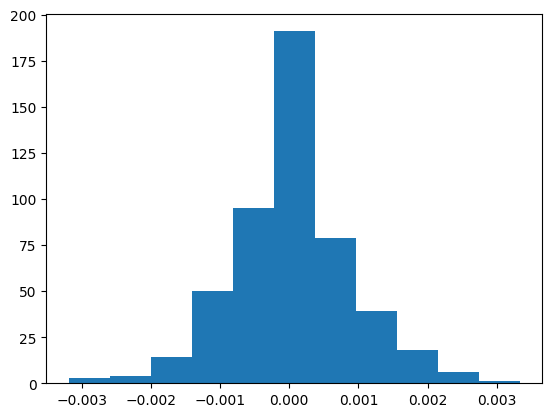

In [25]:
plt.hist(m_boot, bins=11)

In [26]:
m_boot.mean(),  m_boot.std()

(np.float64(2.5257103721854966e-05), np.float64(0.0008621106427580351))

In [32]:
2e-3 / m_boot.std()

np.float64(2.319887843631843)

In [14]:
m_boot.mean() / m_boot.std()

np.float64(-0.0375755752068412)

## Multiple experiments

In [95]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_50/mc_exp_samples_504.npz")

In [96]:
ds['m'].shape

(500,)

(array([  1.,   0.,   0.,   3.,   3.,   2.,  10.,   7.,  20.,  23.,  40.,
         90., 220.,  33.,  18.,  10.,   7.,   5.,   2.,   5.,   1.]),
 array([-2.94968714e-04, -2.78784215e-04, -2.62599716e-04, -2.46415217e-04,
        -2.30230717e-04, -2.14046218e-04, -1.97861719e-04, -1.81677220e-04,
        -1.65492720e-04, -1.49308221e-04, -1.33123722e-04, -1.16939223e-04,
        -1.00754724e-04, -8.45702244e-05, -6.83857252e-05, -5.22012259e-05,
        -3.60167267e-05, -1.98322275e-05, -3.64772830e-06,  1.25367709e-05,
         2.87212701e-05,  4.49057694e-05]),
 <BarContainer object of 21 artists>)

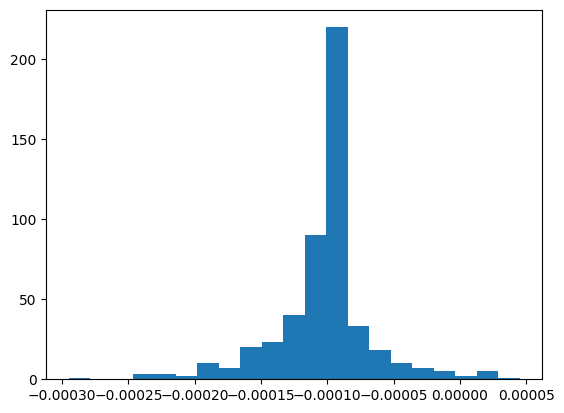

In [97]:
plt.hist(ds['m'], bins=21)

In [100]:
ds['m'].mean(), ds['m'].std()

(np.float64(-0.00010393983434536502), np.float64(3.6902466865459636e-05))

In [99]:
ds['m'].mean() / ds['m'].std()

np.float64(-2.8166093807309056)

## Jacks

In [81]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/tmp2/g_samples_jacks_452.npz")

In [82]:
ds['g_plus'].shape

(100, 1000, 2)

In [83]:
gps = ds['g_plus']
gms = ds['g_minus']

In [84]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(100,)

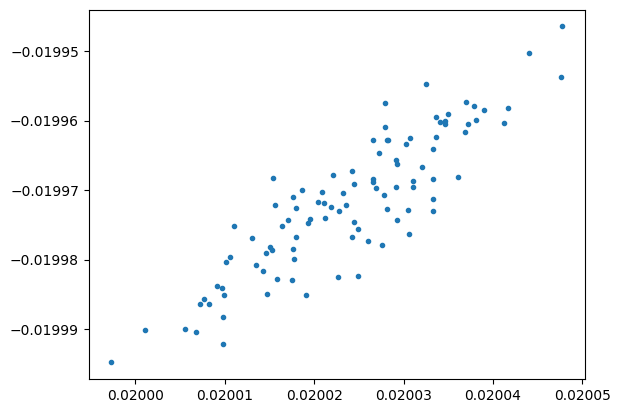

In [85]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [97]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[1.07499854e-10, 9.08745934e-11],
       [9.08745934e-11, 9.89337949e-11]])

In [91]:
m_jacks = (gp1_mean - gm1_mean) / 2 / 0.02 - 1

In [63]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.00012420865052885854)

(array([ 2.,  3.,  9., 12., 29., 14., 11.,  9.,  6.,  5.]),
 array([-4.10151122e-04, -3.50813729e-04, -2.91476335e-04, -2.32138942e-04,
        -1.72801548e-04, -1.13464155e-04, -5.41267612e-05,  5.21063228e-06,
         6.45480258e-05,  1.23885419e-04,  1.83222813e-04]),
 <BarContainer object of 10 artists>)

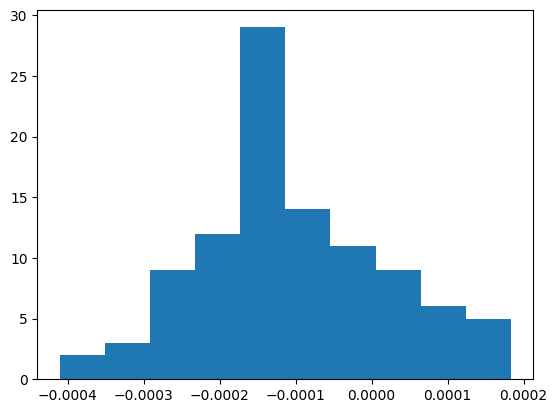

In [54]:
plt.hist(m_jacks)

In [57]:
m_jacks.mean(), m_jacks.std()

(np.float64(-0.00010716381596966085), np.float64(0.0001235860468561769))

In [58]:
np.sqrt(m_jacks.var() * (m_jacks.shape[0] - 1))

np.float64(0.001229665640235661)